In [ ]:
#!pip install PyQt5

#Imports and data

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import numpy as np
import os
import math
import matplotlib.pyplot as plt
import mne
from scipy import signal,io,fftpack

In [ ]:
path = "/content/drive/My Drive/Hackaton/ECoG_Handpose.mat"
Raw = io.loadmat(path)['y']
print(Raw.shape)

(67, 507025)


#Lets test with 1 channel and see what we have

(506974,)


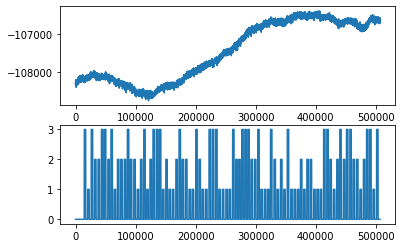

In [ ]:
Test = Raw[1,50:-1]
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(Test)
print(Test.shape)
Hand_pose = Raw[61,50:-1]
ax2 = fig.add_subplot(212)
ax2.plot(Hand_pose)

Take the DC offset off

(506974,)


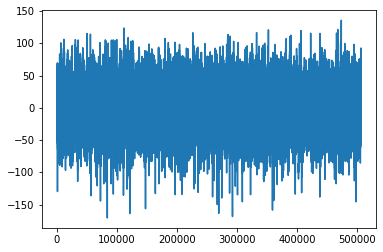

In [ ]:
nyq = 0.5 * 1200
normal_cutoff = float(0.1) / nyq
b, a = signal.butter(3, normal_cutoff, btype='high')
Test_filt = signal.filtfilt(b, a, Test)
print(Test_filt.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Test_filt)

Filter out the 50HZ power line band

(506974,)


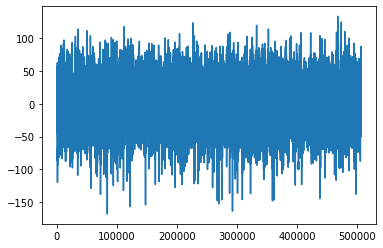

In [ ]:
normal_band = [49 / nyq, 51 / nyq]
b, a = signal.butter(3,normal_band,btype='bandstop')
Test_band = signal.filtfilt(b,a,Test_filt)
print(Test_band.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Test_band)

Take only the High gama?

(506974,)


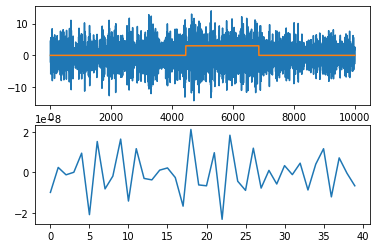

In [ ]:
normal_band = [70 / nyq, 140 / nyq]
b, a = signal.butter(3,normal_band,btype='bandpass')
High_gama = signal.filtfilt(b,a,Test_filt)
print(High_gama.shape)
fig = plt.figure()
ax = fig.add_subplot(211)

ax.plot(High_gama[10000:20000])
ax.plot(Hand_pose[10000:20000])

D_gama = signal.decimate(High_gama,10)
D_pose = signal.decimate(Hand_pose,10)
D_gama = signal.decimate(D_gama,10)
D_pose = signal.decimate(D_pose,10)
ax2 = fig.add_subplot(212)
ax2.plot(D_gama[140:180])
# ax2.plot(D_pose[140:180]/100000)

Creating RawArray with float64 data, n_channels=1, n_times=506974
    Range : 0 ... 506973 =      0.000 ...   422.478 secs
Ready.
Effective window size : 1.707 (s)
Need more than one channel to make topography for ecog. Disabling interactivity.


<ipython-input-118-e98ea3cd1b4f>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=150)


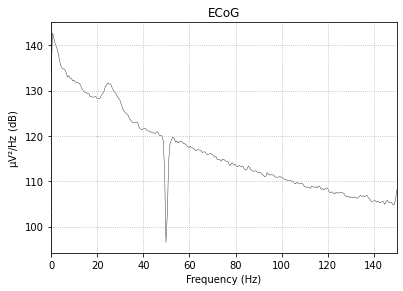

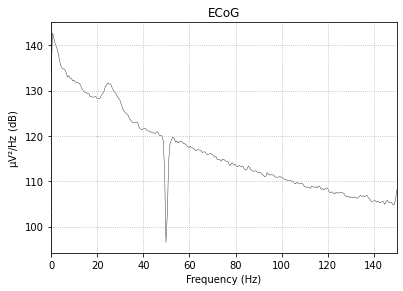

In [ ]:
ch_types = ['ecog']
ch_names = ['ch1']
info = mne.create_info(ch_names=ch_names, sfreq=1200, ch_types=ch_types)
raw = mne.io.RawArray(np.expand_dims(Test_band,axis=0), info)
# scalings = {'ecog': 100}
scalings = 'auto'
raw.plot_psd(fmax=150)
# raw.plot(duration=5, n_channels=2)


#Screen instructions for rock/paper/scis (line 62)

In [ ]:
from scipy import io
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
       print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# rawdata = io.loadmat(path)['y']